In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

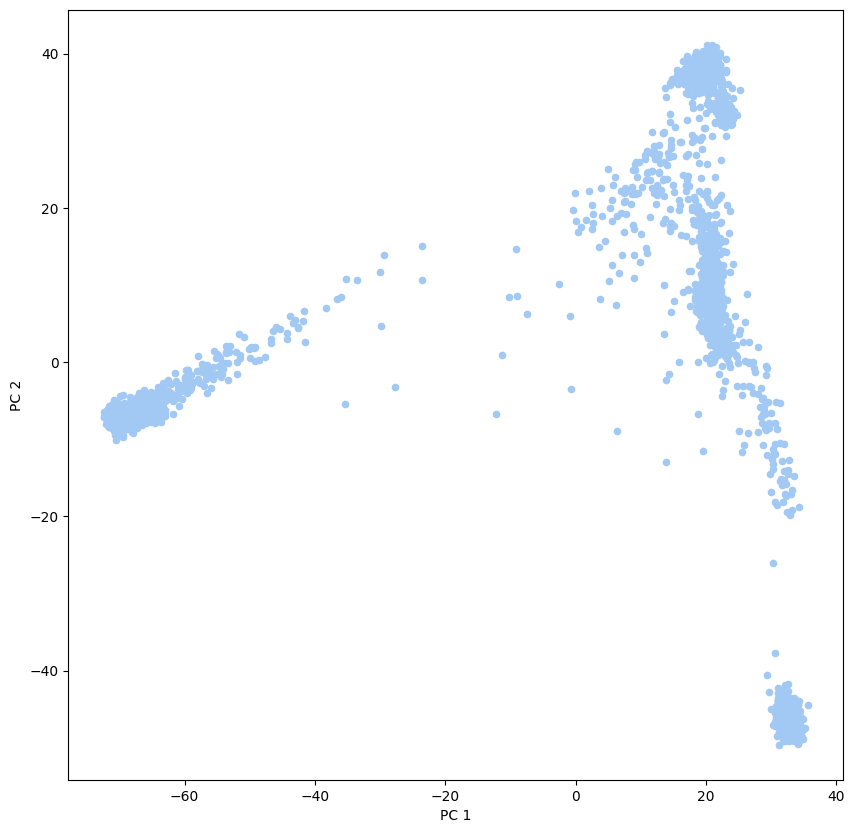

In [157]:
# Read in the data


columns = ['Sample']

for i in range(1, 21):
    columns.append('PC {}'.format(i))

df = pd.read_csv('pca.tsv', delim_whitespace=True, header=0, names=columns, index_col=0)

df[['PC 1', 'PC 2']].plot.scatter(x='PC 1', y='PC 2', figsize=(10, 10))

In [158]:
plt.savefig('pca.png')


<Figure size 640x480 with 0 Axes>

In [159]:
igsr_data = pd.read_csv('igsr_samples.tsv', sep='\t', header=0, index_col=0)

igsr_data

,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
Sample name,,,,,,,,
HG00271,male,SAME123417,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00276,female,SAME123424,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00288,female,SAME1839246,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00290,male,SAME1839057,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00303,male,SAME1840115,FIN,Finnish,EUR,European Ancestry,FIN,1000 Genomes on GRCh38
...,...,...,...,...,...,...,...,...
HGDP00773,female,SAMEA3302906,NaN,Japanese,NaN,East Asia (SGDP),JapaneseSGDP,Simons Genome Diversity Project
R3,male,SAMEA3302714,NaN,Relli,NaN,South Asia (SGDP),RelliSGDP,Simons Genome Diversity Project
NA12236,female,SAMEA6604124,CEU,CEPH,EUR,European Ancestry,CEU,1000 Genomes 30x on GRCh38


In [160]:
df['Population'] = [igsr_data.loc[sample]['Population code'] for sample in df.index]

df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,Population
Sample,,,,,,,,,,,,,,,,,,,,,
HG00097,20.4752,38.80320,-7.04226,10.0078,0.799371,0.315517,-1.493300,0.688541,0.846286,-5.542310,...,-4.218950,11.748600,2.054560,-3.816320,-0.806991,4.948250,1.666520,6.172350,-0.937782,GBR
HG00099,20.8367,40.43420,-9.69485,12.0131,-0.267129,3.698810,1.318790,2.539770,-5.395280,-0.320053,...,3.197190,-1.875070,-0.041869,-3.998560,-1.380560,1.990450,-4.114410,-1.422530,-4.354860,GBR
HG00100,21.6859,39.22010,-6.36154,12.5735,0.093759,0.305906,-0.495040,-0.232709,-4.422760,-5.546150,...,-1.703860,-4.210420,1.198840,-9.758250,4.530290,5.857610,-8.559500,-3.852280,-0.629607,GBR
HG00101,19.9441,37.99510,-8.85630,14.3549,-0.247623,1.649930,-0.107583,1.044610,-0.013929,-1.094010,...,3.547120,4.614630,0.813097,-7.741250,1.122040,5.852520,0.558190,-0.315976,0.789461,GBR
HG00102,21.3776,37.95590,-6.55427,11.5893,1.583500,2.525850,1.287860,2.515720,-4.743310,-3.558500,...,-0.079055,-0.228839,-1.672980,-7.447350,3.976100,3.336130,-5.715890,-4.243310,-5.460350,GBR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,20.5388,10.78520,25.31130,-14.4838,-0.879124,1.702100,0.539861,4.154160,-22.582600,4.923380,...,-6.064130,-0.855394,-0.792398,4.404480,-1.931920,-0.265633,2.442240,-4.694010,6.608810,GIH
NA21141,21.7064,9.76631,26.54430,-12.1815,-2.009410,-0.088621,0.531326,1.722480,-22.374100,5.398300,...,-4.201140,4.588970,-3.809560,1.457520,-0.766646,-0.051835,-0.450373,-1.533250,0.554286,GIH
NA21142,20.8015,10.54580,26.03690,-11.0368,-0.332012,2.235850,0.940668,0.928163,-21.984700,2.449540,...,-8.323240,4.771880,-1.161080,-1.427930,-3.690200,-0.719350,2.557880,-0.539015,-2.138290,GIH


In [161]:
df['Population'].value_counts()

GWD        113
TSI        111
YRI        107
GIH        106
IBS        106
CHB        106
FIN        105
CHS        105
JPT        105
PUR        104
LWK        103
ITU        102
STU        102
ESN        100
CDX        100
CEU         99
KHV         99
GBR         99
ACB         97
PJL         96
CLM         95
MSL         90
BEB         86
PEL         85
MXL         64
ASW         61
IBS,MSL      1
Name: Population, dtype: int64

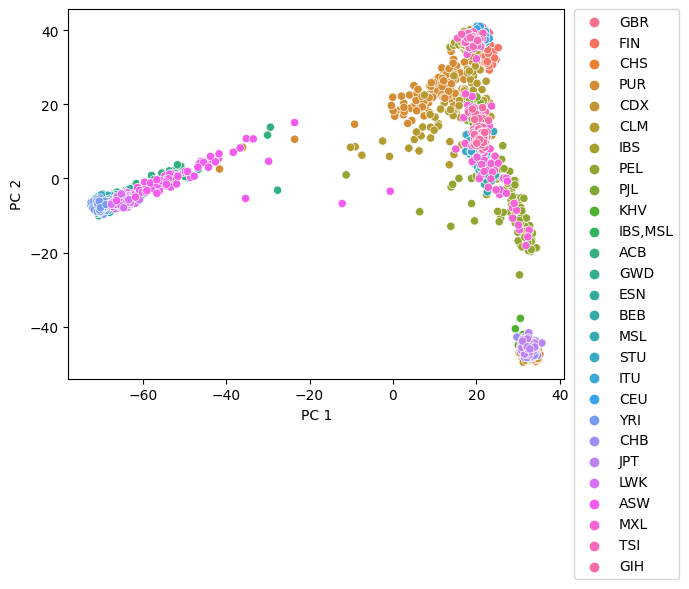

In [162]:
# Plot the first two principal components colored by population
sns.set_palette("pastel")


sns.scatterplot(x = 'PC 1', y =  'PC 2', data=df, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


#df[['PC 1', 'PC 2']].plot.scatter(x='PC 1', y='PC 2', figsize=(10, 10), c=df['Population color'])
#df['Population color'].value_counts()



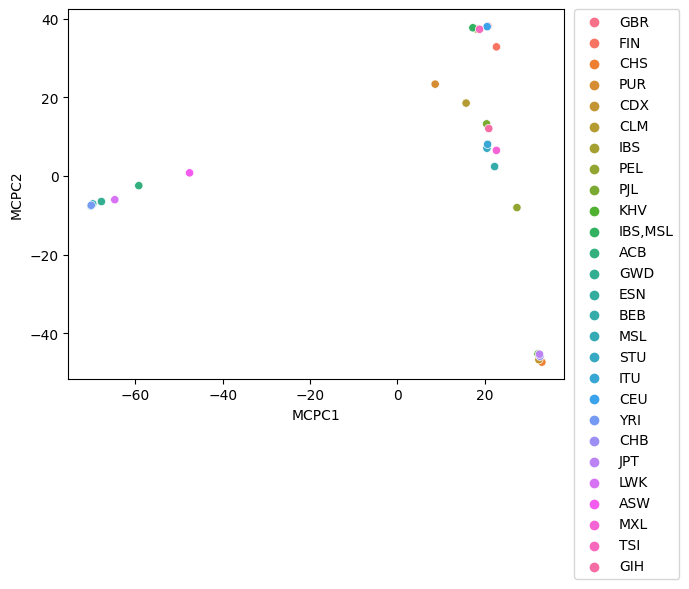

In [163]:
# Create data frame for each population
populations = pd.DataFrame(df['Population'].unique(), columns=['Population'], index=df['Population'].unique())

# Add mean centering 
populations['MCPC1'] = [df[df['Population'] == population]['PC 1'].mean() for population in populations.index]
populations['MCPC2'] = [df[df['Population'] == population]['PC 2'].mean() for population in populations.index]


sns.scatterplot(x = 'MCPC1', y =  'MCPC2', data=populations, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('mean_centered_pca.png')


In [164]:
import os

query_file = 'GFX0224931.weights'
file = open(query_file)


lines = file.readlines()

first_line = lines[0].split()

pc1 = float(first_line[1])
pc2 = float(first_line[2])

print(pc1, pc2)




19.4916 37.8935


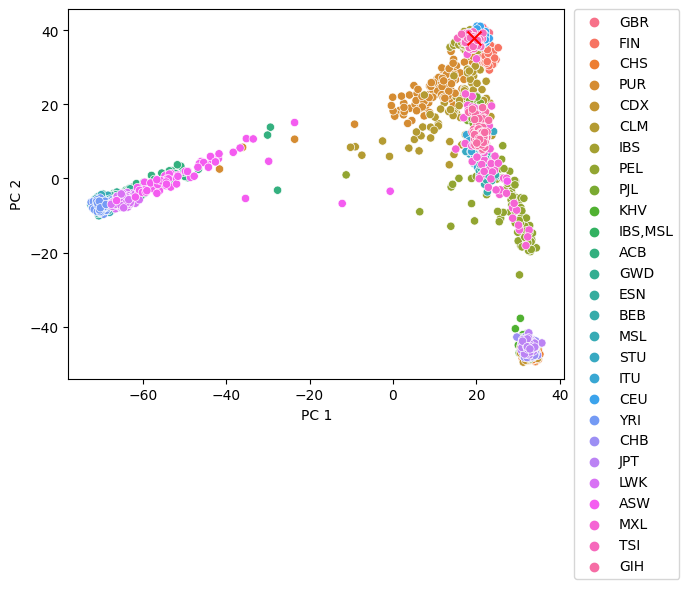

In [165]:
# Plot the first two principal components colored by population
sns.set_palette("pastel")


sns.scatterplot(x = 'PC 1', y =  'PC 2', data=df, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.scatter(pc1, pc2, color='red', s=100, marker='x')

## Calculate delta between all populations and the target population


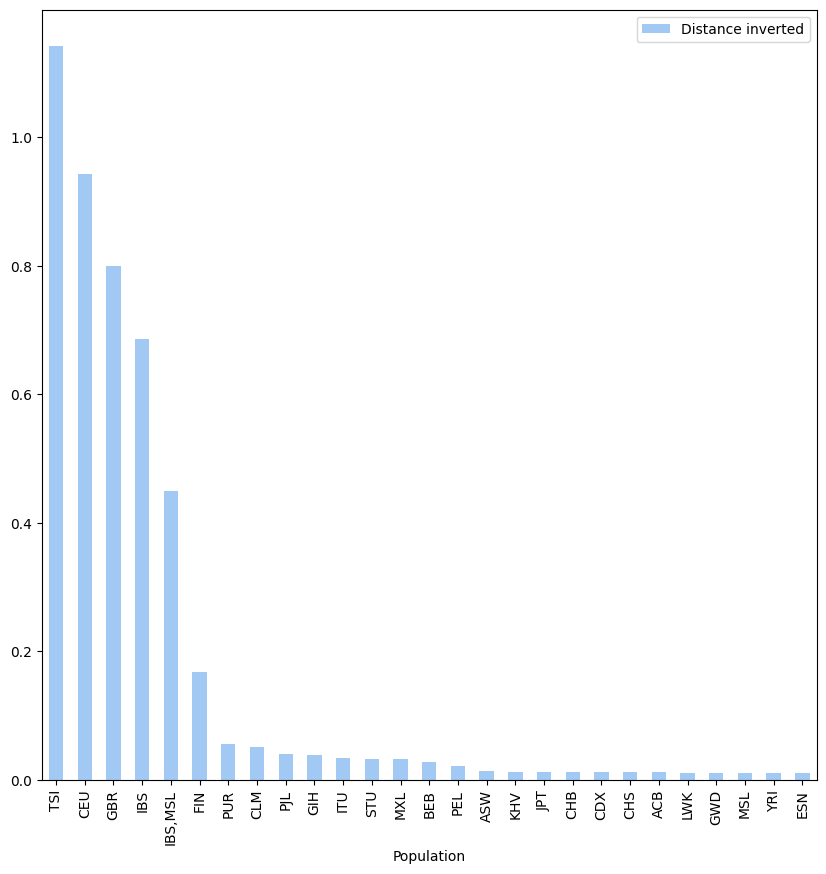

In [166]:
import numpy as np

# Calculate the distance between the query and each population
populations['Distance'] = [np.sqrt((pc1 - populations.loc[population]['MCPC1'])**2 + (pc2 - populations.loc[population]['MCPC2'])**2) for population in populations.index]
populations['Distance inverted'] = 1 / populations['Distance']
populations.sort_values(by='Distance inverted', ascending=False).plot.bar(y='Distance inverted', x='Population', figsize=(10, 10))
plt.savefig('distance.png')